In [35]:
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.graph_objects as go

df = pd.read_csv('D:\DOWNLOADS\Iris Dataset.csv')

# Drop unnecessary columns
df.drop(["Id"],axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
# Create a 3D scatter plot figure
fig = go.Figure(data=go.Scatter3d(
    x=df['PetalLengthCm'],
    y=df['PetalWidthCm'],
    z=df['Species'],
    mode='markers',
    marker=dict(
        size=3,
        color=df['PetalLengthCm'],
        colorscale='Viridis',  # Use a colorscale for the BMI values
        opacity=0.8
    )
))

# Set axis labels and title
fig.update_layout(
    scene=dict(
           xaxis=dict(
            title='Length',
            autorange='reversed'  # Reverse the axis direction
        ),

        yaxis_title='Width',
        zaxis_title=''
    ),
    title='Interactive 3D Scatter Plot:',
    width=700,  # Set the width of the figure
    height=700  # Set the height of the figure
)

fig.show()


In [39]:

# Step 2: Define a PCA Function
def pca(data, k):
    # Standardize the data
    standardized_data = (data - data.mean()) / data.std()

    # Compute the covariance matrix
    covariance_matrix = np.cov(standardized_data, rowvar=False)

    # Compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top k eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :k]

    # Compute the principal components
    principal_components = np.dot(standardized_data, selected_eigenvectors)

    return principal_components, sorted_eigenvalues


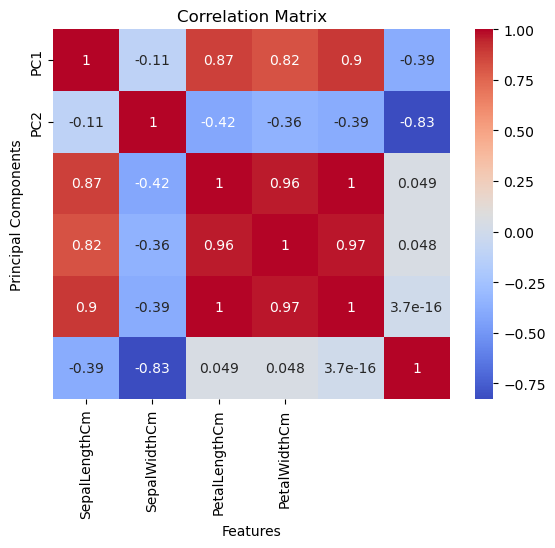

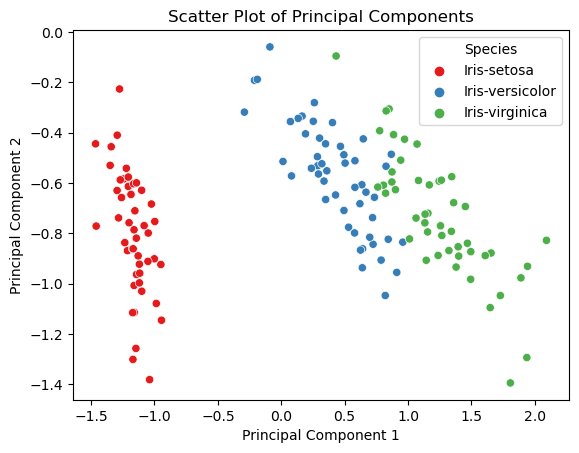

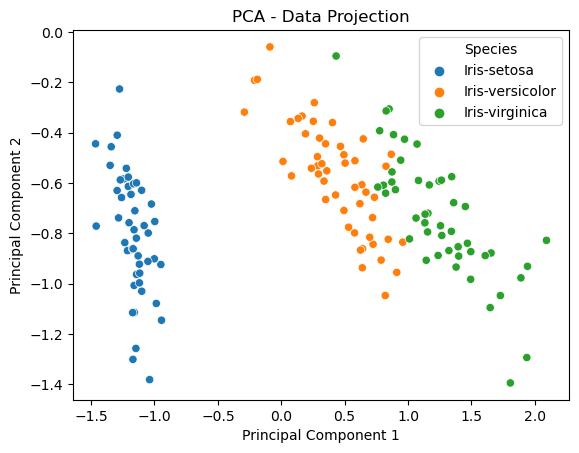

,PC1,PC2,Species
0,-1.190544,-0.864930,Iris-setosa
1,-1.206341,-0.613581,Iris-setosa
2,-1.294704,-0.629899,Iris-setosa
3,-1.222068,-0.541865,Iris-setosa
4,-1.213029,-0.868637,Iris-setosa
...,...,...,...
145,1.154047,-0.794418,Iris-virginica
146,0.942115,-0.509496,Iris-virginica
147,1.062876,-0.739253,Iris-virginica
148,1.132574,-0.758177,Iris-virginica


In [55]:
# Apply PCA with k=2
k = 2
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
principal_components, sorted_eigenvalues = pca(X, k)



# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Add the target variable (Species) to the PCA DataFrame
pca_df['Species'] = data['Species']


# Step 4: Evaluate the Model
# Calculate the correlation matrix between the original features and the principal components
correlation_matrix = np.corrcoef(X.T, principal_components.T)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=data.columns[:-1], 
            yticklabels=['PC1', 'PC2'])
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.title('Correlation Matrix')
plt.show()

# Plot the scatter plot
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()
# Scatter plot of the data projected onto the first two principal components
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=data['Species'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Data Projection')
plt.show()


pca_df